In [32]:
# import necessary librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

%matplotlib inline

# 0. Loading data

In [23]:
# Read data from file
data = pd.read_csv('train.csv')
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# 1. Preprocessing

## Data types

In terms of data type, there are four big groups:
1. Continuous numerical features: lengths, areas, prices
2. Discrete numerical features: numerical scores, number of bedrooms, years; they support order and arithmetic operations, so they can be treated as numerical
3. Ordinal categorical features: features with qualitative scores(such as 'Excellent', 'Good' and 'Fair').
4. Purely categorical features: a few examples are 'MSSubClass' or 'SaleType'

***Featureset Exploration***
* `MSSubClass`: Discrete numerical feature.
* `MSZoning`: Purely categorical feature.
* `LotFrontage`: Continuous numerical feature.
* `LotArea`: Continuous numerical feature.
* `Street`: Purely categorical feature.
* `Alley`: Purely categorical feature.
* `LotShape`: Purely categorical feature.
* `LandContour`: Purely categorical feature.
* `Utilities`: Purely categorical feature.
* `LotConfig`: Purely categorical feature.
* `LandSlope`: Purely categorical feature.
* `Neighborhood`: Purely categorical feature.
* `Condition1`: Purely categorical feature.
* `Condition2`: Purely categorical feature.
* `BldgType`: Purely categorical feature.
* `HouseStyle`: Purely categorical feature.
* `OverallQual`: Discrete numerical feature.
* `OverallCond`: Discrete numerical feature.
* `YearBuilt`: Discrete numerical feature.
* `YearRemodAdd`: Discrete numerical feature.
* `RoofStyle`: Purely categorical feature.
* `RoofMatl`: Purely categorical feature.
* `Exterior1st`: Purely categorical feature.
* `Exterior2nd`: Purely categorical feature.
* `MasVnrType`: Purely categorical feature.
* `MasVnrArea`: Continuous numerical feature.
* `ExterQual`: Ordinal categorical feature. TA, Gd, Ex and Fa.
* `ExterCond`: Ordinal categorical feature. TA, Gd, Ex, Fa and Po.
* `Foundation`: Purely categorical feature.
* `BsmtQual`: Ordinal categorical feature. TA, Gd, Ex and Fa.
* `BsmtCond`: Ordinal categorical feature. TA, Gd, Fa and Po.
* `BsmtExposure`: Ordinal categorical feature. No, Av, Gd and Mn.
* `BsmtFinType1`: Ordinal categorical feature. Unf, GLQ, ALQ, BLQ, Rec and LwQ.
* `BsmtFinSF1`: Continuous numerical feature.
* `BsmtFinType2`: Ordinal categorical feature. Unf, GLQ, ALQ, BLQ, Rec and LwQ.
* `BsmtFinSF2`: Continuous numerical feature.
* `BsmtUnfSF`: Continuous numerical feature.
* `TotalBsmtSF`: Continuous numerical feature.
* `Heating`: Purely categorical feature.
* `HeatingQC`: Ordinal categorical feature.
* `CentralAir`: Purely categorical feature. Y and N.
* `Electrical`: Purely categorical feature. SBrkr, FuseA, FuseF, FuseP and Mix.
* `1stFlrSF`: Continuous numerical feature.
* `2ndFlrSF`: Continuous numerical feature.
* `LowQualFinSF`: Continuous numerical feature.
* `GrLivArea`: Continuous numerical feature.
* `BsmtFullBath`: Discrete numerical feature. 0, 1, 2 and 3.
* `BsmtHalfBath`: Discrete numerical feature. 0, 1 and 2.
* `FullBath`: Discrete numerical feature. 0, 1, 2 and 3.
* `HalfBath`: Discrete numerical feature. 0, 1 and 2.
* `BedroomAbvGr`: Discrete numerical feature. 0 to 8.
* `KitchenAbvGr`: Discrete numerical feature. 0, 1, 2 and 3.
* `KitchenQual`: Ordinal categorical feature. TA, Gd, Ex and Fa.
* `TotRmsAbvGrd`: Discrete numerical feature. 2 to 14.
* `Functional`: Purely categorical feature. Typ, Min1, Min2, Mod, Maj1, Maj2 and Sev.
* `Fireplaces`: Discrete numerical feature. 0, 1, 2 and 3.
* `FireplaceQu`: Ordinal categorical feature. Ex, TA, Gd, Fa and Po.
* `GarageType`: Purely categorical feature. Attchd, Detchd, BuiltIn, Basment, CarPort and 2Types.
* `GarageYrBlt`: Discrete numerical feature.
* `GarageFinish`: Purely categorical feature. Unf, RFn and Fin.
* `GarageCars`: Discrete numerical feature. 0 to 4.
* `GarageArea`: Continuous numerical feature.
* `GarageQual`: Ordinal categorical feature. Ex, TA, Gd, Fa and Po.
* `GarageCond`: Ordinal categorical feature. Ex, TA, Gd, Fa and Po.
* `PavedDrive`: Discrete numerical feature. Y, N and P.
* `WoodDeckSF`: Continuous numerical feature.
* `OpenPorchSF`: Continuous numerical feature.
* `EnclosedPorch`: Continuous numerical feature.
* `3SsnPorch`: Continuous numerical feature.
* `ScreenPorch`: Continuous numerical feature.
* `PoolArea`: Continuous numerical feature.
* `PoolQC`: Ordinal categorical feature. Gd, Ex and Fa.
* `Fence`: Ordinal categorical feature. MnPrv, GdPrv, GdWo and MnWw.
* `MiscFeature`: Purely categorical feature. Shed, Gar2, Othr and TenC.
* `MiscVal`: Continuous numerical feature.
* `MoSold`: Discrete numerical feature. 1 to 12 month.
* `YrSold`: Discrete numerical feature.
* `SaleType`: Purely categorical feature. WD, New, COD, etc.
* `SaleCondition`: Purely categorical feature. Normal, Partial, Abnorml, Family, Alloca and AdjLand.

## Outliers

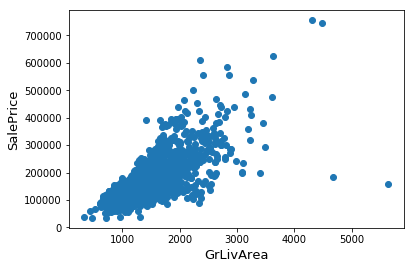

In [25]:
# plot the scatter between 'SalePrice' and 'GrLivArea'

fig, ax = plt.subplots()
ax.scatter(x = data['GrLivArea'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

We can see there are two instances with extremely large GrLivArea that are of a low price. We should remove them.

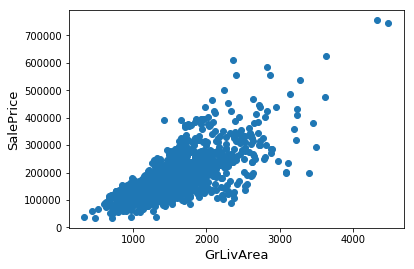

In [27]:
#Deleting outliers

data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(data['GrLivArea'], data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Target Variable

SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 180932.92 and sigma = 79467.79



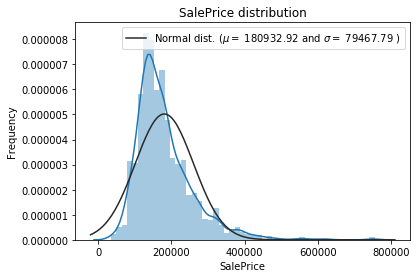

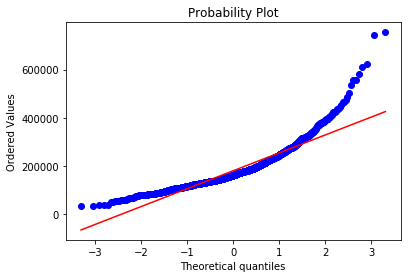

In [33]:
sns.distplot(data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()


 mu = 2.57 and sigma = 0.03



C:\Users\9390\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SalePrice distribution')

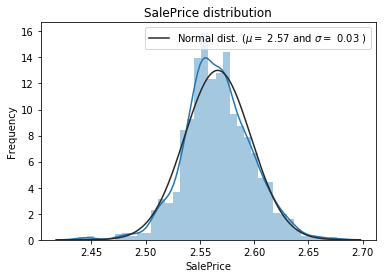

In [35]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
data["SalePrice"] = np.log1p(data["SalePrice"])

#Check the new distribution 
sns.distplot(data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

## Missing values

In [50]:
nans = pd.isnull(data).sum()
nans[nans > 0].sort_values(ascending = False)

MasVnrArea    8
Electrical    1
dtype: int64

The meaning of missing values in each feature:

`PoolQC`: No pool, replacing missing data with None.

`MiscFeature`: No misc feature, replacing missing data with None.

`Alley`: No alley access, replacing missing data with None.

`Fence`: No fence, replacing missing data with None.

`FireplaceQu`: No fireplace, replacing missing data with None.

`LotFrontage`: Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

`GarageYrBlt`: No Garage, replacing missing data with None.

`GarageType`: No Garage, replacing missing data with None.

`GarageFinish`: No Garage, replacing missing data with None.

`GarageQual`: No Garage, replacing missing data with None.

`GarageCond`: No Garage, replacing missing data with None.

`BsmtFinType2`: No basement, replacing missing data with None.

`BsmtExposure`: No basement, replacing missing data with None.

`BsmtFinType1`: No basement, replacing missing data with None.

`BsmtCond`: No basement, replacing missing data with None.

`BsmtQual`: No basement, replacing missing data with None.

`MasVnrArea`: No masonry veneer, replacing missing data with 0.

`MasVnrType`: No masonry veneer, replacing missing data with None.

`Electrical`: Replace missing data with the most common value.


In [47]:
cols_fill_with_none = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageYrBlt','GarageType',
                     'GarageFinish','GarageQual','GarageCond','BsmtFinType2','BsmtExposure','BsmtFinType1',
                     'BsmtCond','BsmtQual','MasVnrType']
for col in cols_fill_with_none:
    data[col] = data[col].fillna('None')

In [49]:
# LotFrontage
data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# MasVnrArea
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

# Electrical
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [46]:
data['Electrical'].value_counts()

SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [ ]:
ExterQual ExterCond BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2

In [4]:
# Numerical features
num_feats = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
             'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 
             'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
             'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
             'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
             'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
             'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
             'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
             'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscVal',
             'YrSold']    

# We need to convert literal grades to a numerical scale
grades = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
          'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
literal = ['Ex', 'Gd', 'TA', 'Fa', 'Po']
num = [9, 7, 5, 3, 2]
G = dict(zip(literal, num))

#data[grades] = data[grades].replace(G)

In [5]:
data[grades]

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC
0,7,5,Gd,TA,Gd,TA,Ex,Gd,NaN,TA,TA,NaN
1,6,8,TA,TA,Gd,TA,Ex,TA,TA,TA,TA,NaN
2,7,5,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,NaN
3,7,5,TA,TA,TA,Gd,Gd,Gd,Gd,TA,TA,NaN
4,8,5,Gd,TA,Gd,TA,Ex,Gd,TA,TA,TA,NaN
5,5,5,TA,TA,Gd,TA,Ex,TA,NaN,TA,TA,NaN
6,8,5,Gd,TA,Ex,TA,Ex,Gd,Gd,TA,TA,NaN
7,7,6,TA,TA,Gd,TA,Ex,TA,TA,TA,TA,NaN
8,7,5,TA,TA,TA,TA,Gd,TA,TA,Fa,TA,NaN
9,5,6,TA,TA,TA,TA,Ex,TA,TA,Gd,TA,NaN


In [23]:
print(data.columns)

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [42]:
data_ID = data['Id']

# Target variable
sale_prices = data['SalePrice']

data.drop(['Id', 'SalePrice'], axis = 1, inplace = True)

In [8]:
data['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [26]:
data.drop('Utilities', axis = 1, inplace = True)

In [27]:
numerical_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                     'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
                      'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                     '3SsnPorch','ScreenPorch','PoolArea','MiscVal']

**Featureset Exploration**
* MSSubClass: 1 to 14 in numerical format, but it should be considered as categorical variable.
* MSZoning: RL, RM, FV, RH and C.
* LotFrontage: continuous.
* LotArea: continuous.
* Street: Pave and Grvl.
* Alley: Pave and Grvl.
* LotShape: Reg, IR1, IR2 and IR3.
* LandContour: Lvl, Bnk, HLS and Low.
* Utilities: AllPub(1459) and NoSeWa(1)
* LotConfig: Inside, Corner, CulDSac, FR2 and FR3.
* LandSlope: Gtl, Mod and Sev.
* Neighborhood: NAmes, CollgCr, OldTown, etc. 
* Condition1: Norm, Feedr, Artery, etc.
* Condition2: Norm, Feedr, Artery, etc.
* BldgType: 1Fam, TwnhsE, Duplex, Twnhs and 2fmCon.
* HouseStyle: 1Story, 2Story, 1.5Fin, etc.
* OverallQual: 1 to 10 in numerical format, but it should be considered as categorical variable.
* OverallCond: 1 to 9 in numerical format, but it should be considered as categorical variable.
* YearBuilt: 
* YearRemodAdd: 
* RoofStyle: Gable, Hip, Flat, Gambrel, Mansard and Shed.
* RoofMatl: CompShg, Tar&Grv, WdShngl, etc.
* Exterior1st: VinylSd, HdBoard, MetalSd, etc.
* Exterior2nd: VinylSd, HdBoard, MetalSd, etc.
* MasVnrType: BrkFace, Stone and BrkCmn.
* MasVnrArea: continuous.
* ExterQual: TA, Gd, Ex and Fa.
* ExterCond: TA, Gd, Ex, Fa and Po.
* Foundation: PConc, CBlock, BrkTil, Slab, Stone and Wood.
* BsmtQual: TA, Gd, Ex and Fa.
* BsmtCond: TA, Gd, Fa and Po.
* BsmtExposure: No, Av, Gd and Mn.
* BsmtFinType1: Unf, GLQ, ALQ, BLQ, Rec and LwQ.
* BsmtFinSF1: continuous.
* BsmtFinType2: Unf, GLQ, ALQ, BLQ, Rec and LwQ.
* BsmtFinSF2: continuous.
* BsmtUnfSF: continuous.
* TotalBsmtSF: continuous.
* Heating: GasA, GasW, Grav, Wall, OthW and Floor.
* HeatingQC: Ex, TA, Gd, Fa and Po.
* CentralAir: Y and N.
* Electrical: SBrkr, FuseA, FuseF, FuseP and Mix.
* 1stFlrSF: continuous.
* 2ndFlrSF: continuous.
* LowQualFinSF: continuous.
* GrLivArea: continuous.
* BsmtFullBath: 0, 1, 2 and 3.
* BsmtHalfBath: 0, 1 and 2.
* FullBath: 0, 1, 2 and 3.
* HalfBath: 0, 1 and 2.
* BedroomAbvGr: 0 to 8.
* KitchenAbvGr: 0, 1, 2 and 3.
* KitchenQual: TA, Gd, Ex and Fa.
* TotRmsAbvGrd: 2 to 14.
* Functional: Typ, Min1, Min2, Mod, Maj1, Maj2 and Sev.
* Fireplaces: 0, 1, 2 and 3.
* FireplaceQu: Ex, TA, Gd, Fa and Po.
* GarageType: Attchd, Detchd, BuiltIn, Basment, CarPort and 2Types.
* GarageYrBlt: 
* GarageFinish: Unf, RFn and Fin.
* GarageCars: 0 to 4.
* GarageArea: continuous.
* GarageQual: Ex, TA, Gd, Fa and Po.
* GarageCond: Ex, TA, Gd, Fa and Po.
* PavedDrive: Y, N and P.
* WoodDeckSF: continuous.
* OpenPorchSF: continuous.
* EnclosedPorch: continuous.
* 3SsnPorch: continuous.
* ScreenPorch: continuous.
* PoolArea: continuous.
* PoolQC: Gd, Ex and Fa.
* Fence: MnPrv, GdPrv, GdWo and MnWw.
* MiscFeature: Shed, Gar2, Othr and TenC.
* MiscVal: continuous.
* MoSold: 1 to 12 month.
* YrSold: 
* SaleType: WD, New, COD, etc.
* SaleCondition: Normal, Partial, Abnorml, Family, Alloca and AdjLand.




In [28]:
data['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [29]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [30]:
null_sum = data.isnull().sum()
null_sum[null_sum>0].sort_values(ascending=False)
#aa[aa>0].sort_values(ascending=False)
#print(data.isnull().sum())

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [31]:
data['MasVnrArea'].fillna(0, inplace=True)
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

In [32]:
cols_fill_with_none = ['PoolQC' , 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageQual', 
         'GarageCond', 'GarageFinish', 'GarageYrBlt', 'GarageType', 'BsmtExposure', 
         'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType']
for col in cols_fill_with_none:
    data[col].fillna("None", inplace=True)

In [33]:
"""
LotFrontage: Since the area of each street connected to the house property
most likely have a similar area to other houses in its neighborhood,
we can fill in missing values by the median LotFrontage of the neighborhood.
"""
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [34]:
#Convert some numerical features into categorical features.
#It's better to use LabelEncoder and get_dummies for these features.

NumStr = ['MSSubClass','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
          'MoSold','YrSold','YearBuilt','YearRemodAdd','LowQualFinSF','GarageYrBlt']
for col in NumStr:
    data[col] = data[col].astype(str)

In [35]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape all_data: {}'.format(data.shape))

Shape all_data: (1460, 78)


In [36]:
from sklearn.preprocessing import MinMaxScaler
numeric_feats = data.dtypes[data.dtypes != "object"].index
print (numeric_feats)

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'Street', u'Alley',
       u'LotShape', u'LandSlope', u'OverallQual', u'OverallCond',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'HeatingQC',
       u'CentralAir', u'1stFlrSF', u'2ndFlrSF', u'GrLivArea', u'FullBath',
       u'KitchenQual', u'TotRmsAbvGrd', u'Functional', u'Fireplaces',
       u'FireplaceQu', u'GarageFinish', u'GarageCars', u'GarageArea',
       u'GarageQual', u'GarageCond', u'PavedDrive', u'WoodDeckSF',
       u'OpenPorchSF', u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch',
       u'PoolArea', u'PoolQC', u'Fence', u'MiscVal', u'MoSold', u'YrSold'],
      dtype='object')


In [37]:
final_data = pd.get_dummies(data)
display(final_data.head(n=5))
print(final_data.columns)

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9,65.0,8450,1,1,3,0,7,4,196.0,...,0,0,0,1,0,0,0,0,1,0
1,4,80.0,9600,1,1,3,0,6,7,0.0,...,0,0,0,1,0,0,0,0,1,0
2,9,68.0,11250,1,1,0,0,7,4,162.0,...,0,0,0,1,0,0,0,0,1,0
3,10,60.0,9550,1,1,0,0,7,4,0.0,...,0,0,0,1,1,0,0,0,0,0
4,9,84.0,14260,1,1,0,0,8,4,350.0,...,0,0,0,1,0,0,0,0,1,0


Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'Street', u'Alley',
       u'LotShape', u'LandSlope', u'OverallQual', u'OverallCond',
       u'MasVnrArea',
       ...
       u'SaleType_ConLw', u'SaleType_New', u'SaleType_Oth', u'SaleType_WD',
       u'SaleCondition_Abnorml', u'SaleCondition_AdjLand',
       u'SaleCondition_Alloca', u'SaleCondition_Family',
       u'SaleCondition_Normal', u'SaleCondition_Partial'],
      dtype='object', length=528)


In [38]:
plt.scatter(x=data.GrLivArea, y=data.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

AttributeError: 'DataFrame' object has no attribute 'SalePrice'

In [39]:
#Deleting outliers
good_data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)

KeyError: 'SalePrice'

In [ ]:
# most correlated features
corrmat = data.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(data[top_corr_features].corr(),annot=True)

In [ ]:
print(sns.distplot(data['SalePrice']))

In [40]:
sns.distplot(np.log(data['SalePrice']))

KeyError: 'SalePrice'

In [ ]:
good_data['SalePrice'] = np.log(good_data['SalePrice'])